<a href="https://colab.research.google.com/github/rachocr/CCADMACL_PROJECT_COM222/blob/main/Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
data = pd.read_csv('steam.csv')

In [ ]:
data = data.dropna()

In [ ]:
data.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
genres_encoded = data['genres'].str.get_dummies(sep=';')
owner_encoded = data['owners'].str.get_dummies()
features = ['positive_ratings', 'negative_ratings']
data_Hierarchical = pd.concat([data[features], genres_encoded, data['name']], axis=1)

In [ ]:
columns_to_check = ['Accounting','Animation & Modeling', 'Audio Production', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Game Development', 'Photo Editing'
, 'Software Training', 'Tutorial', 'Utilities', 'Video Production', 'Web Publishing']
# Loop through the columns and drop rows where the value is 1
for column in columns_to_check:
    data_Hierarchical = data_Hierarchical[data_Hierarchical[column] != 1]

data_Hierarchical = data_Hierarchical.drop(columns_to_check , axis=1)


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_Hierarchical.drop(['name'], axis=1))


In [ ]:
linked = linkage(scaled_data, method='ward')

In [ ]:
num_clusters = 7
agg_clust = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
data_Hierarchical['Cluster'] = agg_clust.fit_predict(scaled_data)

Games in Cluster 0:
0               Counter-Strike
1        Team Fortress Classic
2                Day of Defeat
3           Deathmatch Classic
4    Half-Life: Opposing Force
Name: name, dtype: object 

Games in Cluster 1:
81                   FlatOut 2™
82                  Xpand Rally
84           Xpand Rally Xtreme
123        RACE - The WTCC Game
124    RACE: Caterham Expansion
Name: name, dtype: object 

Games in Cluster 2:
25       Counter-Strike: Global Offensive
12836       PLAYERUNKNOWN'S BATTLEGROUNDS
Name: name, dtype: object 

Games in Cluster 3:
132     Company of Heroes - Legacy Edition
473                      Penumbra Overture
778                                  Mafia
1430                    Zombie Playground™
1468                                Lucius
Name: name, dtype: object 

Games in Cluster 4:
189                                X-Blades
190                        Two Worlds II HD
471     Penumbra: Black Plague Gold Edition
685                                The Voi

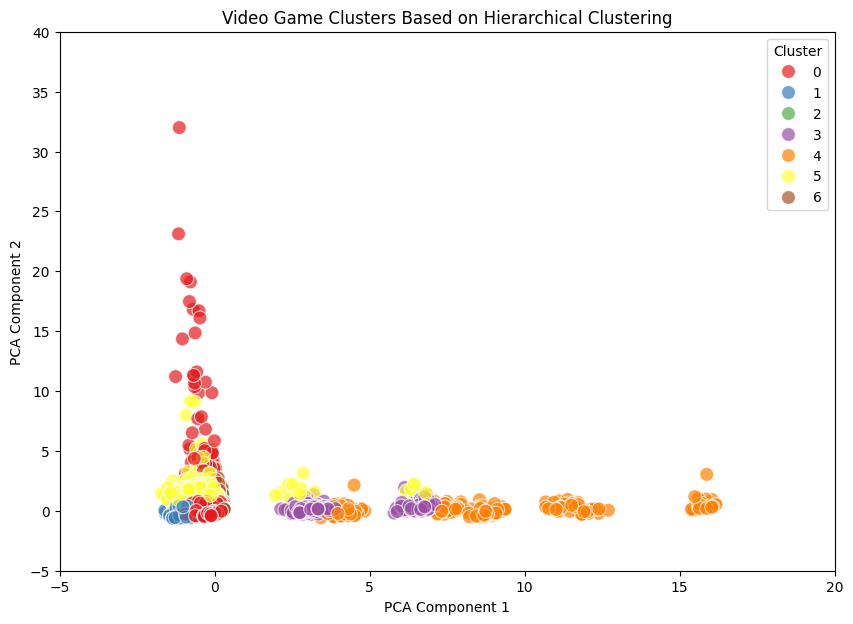

In [ ]:
# Print the resulting clusters
for cluster_id in range(num_clusters):
    print(f"Games in Cluster {cluster_id}:")
    cluster_games = data_Hierarchical[data_Hierarchical['Cluster'] == cluster_id]['name']
    print(cluster_games.head(), "\n")

# Optionally, you can visualize the clusters using PCA or t-SNE for dimensionality reduction
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data_Hierarchical['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Video Game Clusters Based on Hierarchical Clustering')
plt.xlim(-5, 20)
plt.ylim(-5, 40)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Cluster')
plt.show()